# ATP 2021/22

## TPC8 - Processamento de Datasets 

* Identificador: TPC8
* Título: Processamento de Datasets
* Data Início: 2021-12-02
* Data Fim: 2021-12-09
* Supervisor: José Carlos Leite Ramalho, https://www.di.uminho.pt/~jcr/ 
* Autor: Mariana Martins Sousa, A96225

### Resumo:

De modo a dar continuação ao material lecionado na aula Teórico-Prática 8, neste ficheiro, elaborado em linguagem _Python_ , encontra-se o código fonte com a resolução dos exercícios propostos na __Ficha Técnica__, sendo que permite __ler datasets, processá-los e produzir dados estatísticos__.

Este programa processa a informação contida no ficheiro __emd.csv__, que também se encontra disponível, começando pela __leitura__ da base de dados através da _função lerDataset()_ seguido pela __listagem__ da mesma (_função listarDataset()_ ), com o propósito de o utilizador visualizar toda a informação presente no ficheiro, dividindo-a nas respetivas colunas id, data, nome, idade, gênero, modalidade, clube, email e resultado.

Este código também possibilita ao utilizador encontrar um dado exame médico desportivo através do seu id registado, recorrendo à _função consultarDataset()_ . É possível ainda fazer a distribuição dos EMDs por qualquer parâmetro, _função distrib()_ , tal como pela modalidade, _função distribPorModalidade()_ , pelo clube, _função distribPorClube()_ , ou pelo ano, _função distribPorAno()_ .

Para a produção dos __gráficos em barra__ das __distribuições__ , recorre-se à biblioteca _matplotlib_ juntamente com as _funções plotDistribPorModalidade() e plotDistrib()_ para uma distribuição por modalidades e por dado index, respetivamente.

Adicionalmente, para um mais dinâmico processamento do dataset através deste código, foi gerada uma __interface GUI__, usando para tal o _PySimpleGUI_ .

#### Exercício 1 - Leitura

In [1]:
def convBool(v):
    return v == 'true'

def lerDataset(fnome):
    f = open(fnome, encoding="utf-8")
    bd = []
    
    f.readline()
    for linha in f :
        novaLinha = linha.strip("\n")
        campos = novaLinha.split(",")
        
        emd = []
        emd.append("emd" + str(campos[1])) # criar novo id
        emd.append(campos[2])
        emd.append(campos[4] + " " + campos[3]) # primeiro nome + último nome
        emd = emd + campos[5:]
        emd[-2] = convBool(emd[-2])
        emd[-1] = convBool(emd[-1])
        
        bd.append(emd)
    return bd

BD = lerDataset("emd.csv")

#### Exercício 2 - Listagem

In [2]:
def listarDataset(bd):
    print("id  |  data  |  nome  |  idade  |  gênero  |  modalidade  |  clube  |  email  |  resultado")
    print("------------------------------------------------------------------------------------------")
    for emd in bd :
        if emd[-1] :
            res = "Apto"
        else :
            res = "Não Apto"
            
        print(emd[0] + " | " + emd[1] + " | " + emd[2] + " | " + emd[3] + " | " + emd[4] + " | " + emd[5] + " | " + emd[6] + " | " + emd[7] + " | " + res)
    
listarDataset(BD)

id  |  data  |  nome  |  idade  |  gênero  |  modalidade  |  clube  |  email  |  resultado
------------------------------------------------------------------------------------------
emd0 | 2020-02-25 | Gay Delgado | 28 | F | Gloucester | BTT | ACRroriz | Apto
emd1 | 2019-07-31 | Prince Foreman | 34 | M | Forestburg | Ciclismo | ACDRcrespos | Apto
emd2 | 2021-01-06 | Berger Cheryl | 21 | M | Umapine | Basquetebol | Vitoria | Apto
emd3 | 2020-11-19 | Goff Graves | 29 | F | Babb | Andebol | AVCfamalicão | Não Apto
emd4 | 2019-09-01 | Bolton Mckay | 29 | F | Chilton | Futebol | ACDRcrespos | Não Apto
emd5 | 2019-10-07 | Kelley Marla | 22 | M | Clarence | Atletismo | AmigosMontanha | Não Apto
emd6 | 2020-12-11 | Maddox Merrill | 34 | M | Roderfield | Equitação | ACRroriz | Apto
emd7 | 2019-03-12 | Calderon Nikki | 22 | F | Brethren | Patinagem | EDViana | Não Apto
emd8 | 2020-12-09 | Bright Lucia | 35 | F | Onton | Orientação | GDGoma | Não Apto
emd9 | 2020-01-26 | Wells Faith | 31 | F | Gr

#### Exercício 3 - Consultar um Registo

In [3]:
def consultarDataset(bd, id):
    for emd in bd :
        if emd[0] == id :
            if emd[-1] :
                res = "Apto"
            else :
                res = "Não Apto"
                
            print(emd[0] + " | " + emd[1] + " | " + emd[2] + " | " + emd[3] + " | " + emd[4] + " | " + emd[5] + " | " + emd[6] + " | " + emd[7] + " | " + res)
            
consultarDataset(BD, "emd14")

emd14 | 2019-05-05 | Strong Lester | 21 | M | Freetown | Patinagem | GDGoma | Não Apto
emd14 | 2019-06-01 | Talley Alberta | 32 | M | Canterwood | Orientação | ABCbraga | Apto
emd14 | 2020-02-27 | Leon Petra | 32 | M | Delshire | Equitação | EDViana | Não Apto


#### Exercício 4 - Lista de Modalidades 

In [4]:
def modalidades(bd):
    listaModalidades = []
    for emd in bd :
        if emd[6] not in listaModalidades :
            listaModalidades.append(emd[6])
    listaModalidades.sort()
    return listaModalidades

modalidades(BD)

['Andebol',
 'Atletismo',
 'BTT',
 'Badminton',
 'Basquetebol',
 'Ciclismo',
 'Dança',
 'Equitação',
 'Esgrima',
 'Futebol',
 'Karaté',
 'Orientação',
 'Parapente',
 'Patinagem',
 'Triatlo']

#### Exercício 5 - Distribuição por Modalidade

In [5]:
def distribPorModalidade(bd):
    distribMod = {}
    for emd in bd :
        if emd[6] in distribMod.keys() :
            distribMod[emd[6]] = distribMod[emd[6]] + 1
        else :
            distribMod[emd[6]] = 1
    return distribMod

distribPorModalidade(BD)

{'BTT': 29,
 'Ciclismo': 23,
 'Basquetebol': 24,
 'Andebol': 21,
 'Futebol': 21,
 'Atletismo': 16,
 'Equitação': 13,
 'Patinagem': 14,
 'Orientação': 17,
 'Triatlo': 23,
 'Dança': 22,
 'Karaté': 21,
 'Badminton': 24,
 'Esgrima': 15,
 'Parapente': 17}

#### Exercício 6 - Distribuição por Clubes

In [6]:
def distribPorClube(bd):
    distribClube = {}
    for emd in bd :
        if emd[7] in distribClube.keys() :
            distribClube[emd[7]] = distribClube[emd[7]] + 1
        else :
            distribClube[emd[7]] = 1
    return distribClube

distribPorClube(BD)

{'ACRroriz': 37,
 'ACDRcrespos': 41,
 'Vitoria': 32,
 'AVCfamalicão': 31,
 'AmigosMontanha': 35,
 'EDViana': 34,
 'GDGoma': 26,
 'SCBraga': 34,
 'ABCbraga': 30}

#### Exercício 7 - Distribuição por Ano

In [7]:
def distribPorAno(bd):
    distribAno = {}
    for emd in bd :
        ano = emd[1][0:4]
        if ano in distribAno.keys() :
            distribAno[ano] = distribAno[ano] + 1
        else :
            distribAno[ano] = 1
    return distribAno

distribPorAno(BD)

{'2020': 138, '2019': 145, '2021': 17}

#### Exercício 8 - Distribuição Parametrizada

In [8]:
def distrib(bd, index):
    distrib = {}
    for emd in bd :
        if emd[index] in distrib.keys() :
            distrib[emd[index]] = distrib[emd[index]] + 1
        else :
            distrib[emd[index]] = 1
    return distrib

distrib(BD, 4)

{'F': 159, 'M': 141}

### Gráficos

In [9]:
import matplotlib.pyplot as plt

#### Exercício 9 - Gráfico da Distribuição por Modalidade

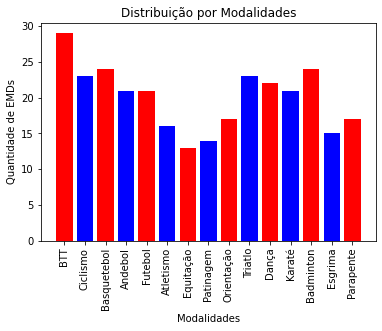

In [10]:
def plotDistribPorModalidade(bd):
    BD = distribPorModalidade(bd)
    
    listaModalidades = []
    for emd in bd :
        if emd[6] not in listaModalidades :
            listaModalidades.append(emd[6])
            
    x = [n for n in range(len(listaModalidades))]
    plt.xlabel('Modalidades')
    plt.xticks(rotation=90)
    
    y = []
    for n in x :
        y.append(BD[listaModalidades[n]])
    plt.ylabel('Quantidade de EMDs')
    
    plt.title('Distribuição por Modalidades')
    plt.bar(x, y, tick_label=listaModalidades, width=0.8, color=['red','blue'])
    
plotDistribPorModalidade(BD)

#### Exercício 10 - Gráfico da Distribuição Parametrizada

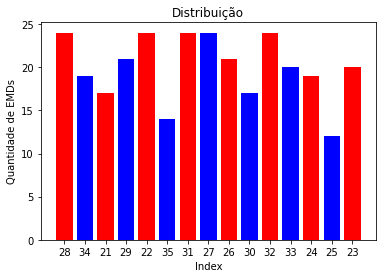

In [11]:
def plotDistrib(bd, index):
    BD = distrib(bd, index)
    
    lista = []
    for emd in bd :
        if emd[index] not in lista :
            lista.append(emd[index])
    
    x = [n for n in range(len(lista))]
    plt.xlabel('Index')
    
    y = []
    for n in x :
        y.append(BD[lista[n]])
    plt.ylabel('Quantidade de EMDs')
    
    plt.title('Distribuição')
    plt.bar(x, y, tick_label=lista, width=0.8, color=['red','blue'])
    
plotDistrib(BD, 3)

### Interface GUI - App: Processamento de Datasets

In [ ]:
import PySimpleGUI as sg

def separador():
    print("-------------------------------------------------------------------------------------------------------")

interfacePrincipal = [
    [sg.InputText("Introduza um dataset: ", font=("Arial", 20), key="_dataset"), sg.Button("Leitura"), sg.Button("Listagem")], 
    [sg.InputText("Introduza id do EMD que pretende consultar: ", font=("Arial", 20), key="_id"), sg.Button("Consultar Registo")], 
    [sg.Button("Distribuição por Modalidade"), sg.Button("Distribuição por Clube"), sg.Button("Distribuição por Ano")],
    [sg.InputText("Introduza o index do parâmetro: ", font=("Arial", 20), key="_index"), sg.Button("Distribuir"), sg.Button("Gerar Gráfico")],
    [sg.Output(size=(60,20))]
]

window = sg.Window(title="Processamento de Datasets", font=("Helvetica", 24), default_element_size=(40,20)).Layout(interfacePrincipal)

stop = False
while not stop :
    event, values = window.read()
    if event == sg.WIN_CLOSED :
        stop = True
        
    elif event == "Leitura" :
        BD = lerDataset(values["_dataset"])
        
    elif event == "Listagem" :
        print("Listagem do Dataset: ")
        listarDataset(BD)
        separador()
                
    elif event == "Consultar Registo" :
        print("Consulta do registo " + values["_id"] + ": ")
        consultarDataset(BD, values["_id"])
        separador()
        
    elif event == "Distribuição por Modalidade" :
        print("Distribuição por Modalidade: ")
        print(distribPorModalidade(BD))
        separador()
        
    elif event == "Distribuição por Clube" :
        print("Distribuição por Clube: ")
        print(distribPorClube(BD))
        separador()
        
    elif event == "Distribuição por Ano" :
        print("Distribuição por Ano")
        print(distribPorAno(BD))
        separador()
        
    elif event == "Distribuir" :
        index = int(values["_index"])
        print("Distribuição por Index " + str(index) + ":")
        print(distrib(BD, index))
        separador()
        
    elif event == "Gerar Gráfico" :
        interfaceGrafico = [
            [sg.Text()]
        ]
        index = int(values["_index"])
        plotDistrib(BD, index)
    
    
    else :
        print(event + ":\n")
        print(values)

window.close()